# Activities

## Get data

In [1]:
# Import necessary libraries and packages

import pandas as pd
from data import Bellabeat
from activities import Activities

In [2]:
# bb = Bellabeat()
ac = Activities()
activities_df = ac.get_activities_data()
activities_df.head()

CSV Path: /Users/nico_marais/code/Projects/bellabeat_capstone/data/csv
CSV Path: /Users/nico_marais/code/Projects/bellabeat_capstone/data/csv


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
import matplotlib.pyplot as plt

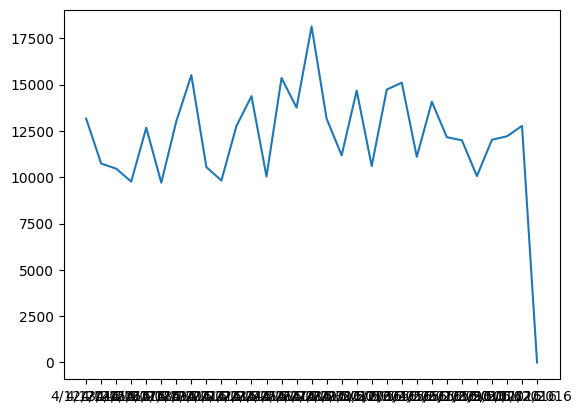

In [4]:
id_1 = activities_df[activities_df["Id"] == 1503960366]
plt.plot(id_1["ActivityDate"], id_1["TotalSteps"])
plt.show()